In [1]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt 
from astropy.io import ascii 
from astropy.table import Table, Column, MaskedColumn





This will be what is part of the mark down I would implement with the sphinx, once I understand how to work it. 

This project includes spectrscopic observations taken at the DAO with the SITe-2 detector. For the purpose of  inspecting flux profiles of spectral lines gathered with various instruments, we have to use a the normalized spectrum. We do this by fitting the continuum. We segment the data into several bins containing 100 data point following their order in wavelength. We select the median flux within each bin, which allows us to reduce the weight of outlying data, such as points along emission, absoprtion lines, and instrumental noise. All polynomial fitting was conducted to 3rd order using built in numpy function.




In [3]:
### 45, 46, 47,  48, 61, 62, 63, 64, 83, 84, 85 

###This cell is intended to test individual DAO files, for purposes such as 
##reviewing the headers 
##it also allow for the use to know how information stored in the headers are 
## labeled
hdu = fits.open('dao_c182_2019_020585_v.fits')


###Loading in the data 
data = hdu[0].data

##assigning the headers to a variable. 
header1 = hdu[0].header

####neatly prints the headers. 
print(repr(header1))

#####one can call out puts of individual headers. 
#print(header['MJD-OBS']) 
#print(header['HJD'])

#print(Filename)

SIMPLE  =                    T / Fits standard                                  
BITPIX  =                  -32 / Bits per pixel                                 
NAXIS   =                    1 / Number of axes                                 
NAXIS1  =                 1739 / Axis length                                    
EXTEND  =                    F / File may contain extensions                    
ORIGIN  = 'NOAO-IRAF FITS Image Kernel July 2003' / FITS file originator        
DATE    = '2021-01-26T23:06:42' / Date FITS file was generated                  
IRAF-TLM= '2021-01-26T23:06:42' / Time of last modification                     
EXPTIME =                 1800 /                                                
DETECTOR= 'SITe-2'             / detector name                                  
XBIN    =                    1 /                                                
YBIN    =                    2 /                                                
PIXSIZE =                 15

In [3]:
####General information about the structure of the fits file
hdu.info()

Filename: dao_c182_2019_020585_v.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     107   (1738,)   float32   


## dao_normal is the primary function for continuum normalization specifically for data acquired at the DAO. This can be modified to normalize other full spectra. 

In [8]:
####this function will normalize spectrum from the DAO. 
#### this function requires two inputs the array containing the fluxes
##(flux_dao) and one containing the wavelenght(lambda_dao) 

def dao_normal(wave_len, flux):
    """ The input for this function needs to be numpy arrays  """  
    ####these are empty array in which we will store the median fluxes and wavelengths of each bin 
    
    
    array_size = flux.size 
    
    flux_med = np.zeros(17)
    wave_med = np.zeros(17)
    ###binning and finding the median flux and wavelength each bin. 
    ### iterations and bin size a set by the indices in the inputed arrays. 
    
    
    for i in range(0, 17): 
        ###the index upper boundary for a each successive bin.
        n = i *100 + 99 
        
        ####the lower bound.
        n_low = i *100
    
        ###breaking down each array into segments of the set bin size 
        data_seg = flux[n_low: n + 1] 
        wave_seg = wave_len[n_low: n + 1]
        
        ###extracts the median and stores it defined arrays outside the loop
        med =   np.median(data_seg) 
        flux_med[i] = med
    
        mid_wave = np.median(wave_seg) 
    
        wave_med[i] = mid_wave  
     
    #### polynomial fitting of the median fluxes with respect to the median wavelenths 
    ### the integer at the end of the function idicates the order of the polynomial fit . 
    ### Refer to numpy documentation on these functions as needed. 
    p2 = np.poly1d(np.polyfit(wave_med, flux_med , 3))   
    
    ##the final normalization of the spectrum to the median-derived continuum fit.
    normed_spec = flux_dao / p2(lamda_dao)
     
    ### this function will return the normalized spectrum and the polynomial fits used.     
    return normed_spec, p2

In [6]:
help(np.arange)

Help on built-in function arange in module numpy:

arange(...)
    arange([start,] stop[, step,], dtype=None)
    
    Return evenly spaced values within a given interval.
    
    Values are generated within the half-open interval ``[start, stop)``
    (in other words, the interval including `start` but excluding `stop`).
    For integer arguments the function is equivalent to the Python built-in
    `range` function, but returns an ndarray rather than a list.
    
    When using a non-integer step, such as 0.1, the results will often not
    be consistent.  It is better to use `numpy.linspace` for these cases.
    
    Parameters
    ----------
    start : number, optional
        Start of interval.  The interval includes this value.  The default
        start value is 0.
    stop : number
        End of interval.  The interval does not include this value, except
        in some cases where `step` is not an integer and floating point
        round-off affects the length of `out`.
   

In [79]:
####This of the two subsrcipts used to process and normalize the DAO data 


###this can be converted into a function if needed. For the purpose of this project the following 
## script was the faster approach. 

#### the list of the last two unique digits on the set of files used 
end_tele = ([45, 46, 47,  48, 61, 62, 63, 64, 83, 84, 85])

#hjds = np.zeros(np.size(end_tele)) 

dao_name = [] 

dao_fit = np.zeros((np.size(end_tele), 4))


for i in range (0, np.size(end_tele)): 
    
    #print(str(i) + ' dao') 
    
    ###loading in the fits file. 
    ##.fits is what goes in, and .dat will be the output with similar name. 
    
    hdu = fits.open('../DAOdata/dao_c182_2019_0205' + str(end_tele[i]) +'_v.fits') 
    dao_data = hdu[0].data
    dao_header1 = hdu[0].header  
    
    dao_name.append('dao_c182_2019_0205' + str(end_tele[i]) +'_v.dat') 
    hjds[i] = dao_header1['HJD']
    
    
    #total_rotation =  rot_phase(dao_header1['HJD']) 
    #dao_rot_num, dao_phase = rot_num_phase_sep(total_rotation) 
    
    
    ####building the wavelegnth array from the pixel information in the headers.
    pixel0 = dao_header1['CRPIX1']
    delta_w = dao_header1['CDELT1']
    w0 = dao_header1['CRVAL1']

    wave_dao = (w0 + np.arange(0,dao_data.size, 1)*delta_w ) /10.0  
    
    ### this is where the spectum is normalized by the continuum fit.
    dao_normed = dao_normal( dao_data,  wave_dao)
    
    ##### saving the fitting parameters 
    fit = dao_normed[1] 
    dao_fit[i, 0], dao_fit[i, 1], dao_fit[i, 2], dao_fit[i, 3]  = fit[3], fit[2], fit[1], fit[0] 
    
    
    ####storing the normalized flux
    dao_flux_normed = dao_normed[0]
    
    
    ### storing the wavelength and normalized flux in the output file
    
    #dao_data = Table([wave_dao, dao_flux_normed], names=['lambda', 'flux'])
    #ascii.write(dao_data, dao_name[i] ,overwrite=True)  

#plt.plot(wave_dao, dao_normed)    
#print(dao_fit)     




[[-5.77675770e-03  1.01004323e+01 -5.88418597e+03  1.14256593e+06]
 [-5.95126146e-03  1.04110126e+01 -6.06808167e+03  1.17883638e+06]
 [-6.54225025e-03  1.14635582e+01 -6.69329631e+03  1.30261062e+06]
 [-7.67665380e-03  1.34560332e+01 -7.85854653e+03  1.52973243e+06]
 [ 1.10133822e-02 -1.96443118e+01  1.16834889e+04 -2.31559449e+06]
 [ 1.55495939e-02 -2.76815968e+01  1.64310815e+04 -3.25034133e+06]
 [ 1.47787491e-02 -2.65979422e+01  1.59609845e+04 -3.19116133e+06]
 [ 2.21362709e-02 -3.94402489e+01  2.34301645e+04 -4.63880536e+06]
 [ 7.73740277e-03 -1.38280008e+01  8.24254334e+03 -1.63731513e+06]
 [ 5.12731794e-03 -9.22603190e+00  5.53865688e+03 -1.10786296e+06]
 [ 5.98080974e-03 -1.06822619e+01  6.36290605e+03 -1.26311936e+06]]


In [ ]:
print(hjds) 

In [4]:
##### 2021 dao  data 

###Using header to get information on each individual file.

hdu = fits.open('January2021DAO/dao_c182_2021_000737_v.fits') 



data = hdu[0].data
header1 = hdu[0].header

print(repr(header1))

SIMPLE  =                    T / Fits standard                                  
BITPIX  =                  -32 / Bits per pixel                                 
NAXIS   =                    1 / Number of axes                                 
NAXIS1  =                 1739 / Axis length                                    
EXTEND  =                    F / File may contain extensions                    
ORIGIN  = 'NOAO-IRAF FITS Image Kernel July 2003' / FITS file originator        
DATE    = '2021-01-26T23:06:42' / Date FITS file was generated                  
IRAF-TLM= '2021-01-26T23:06:42' / Time of last modification                     
EXPTIME =                 1800 /                                                
DETECTOR= 'SITe-2'             / detector name                                  
XBIN    =                    1 /                                                
YBIN    =                    2 /                                                
PIXSIZE =                 15

In [5]:
end_tele = ([669, 670, 671, 672, 731, 732, 733,  734, 737, 738])
names = [] 
dates = []

hjds = np.zeros(np.size(end_tele))

for i in range (0, np.size(end_tele)): 
    
    hdu = fits.open('January2021DAO/dao_c182_2021_000' + str(end_tele[i]) +'_v.fits')
    hdu.info()
    header = hdu[0].header
        
    #hjds[i] =  header['HJD']
    
    names.append('dao_c182_2021_000' + str(end_tele[i]))

Filename: January2021DAO/dao_c182_2021_000669_v.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     107   (1739,)   float32   
Filename: January2021DAO/dao_c182_2021_000670_v.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     107   (1739,)   float32   
Filename: January2021DAO/dao_c182_2021_000671_v.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     107   (1739,)   float32   
Filename: January2021DAO/dao_c182_2021_000672_v.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     107   (1739,)   float32   
Filename: January2021DAO/dao_c182_2021_000731_v.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     107   (1739,)   float32   
Filename: January2021DAO/dao_c182_2021_000732_v.fits
No.    Name      Ver    Type      Cards   Dimensions   Fo

In [6]:
#hjds

array([2459236.75779217, 2459236.78850795, 2459236.80991857,
       2459236.83130592, 2459237.67701531, 2459237.69791673,
       2459237.7188064 , 2459237.73970785, 2459237.77106011,
       2459237.79196162])

In [5]:
#### This is a duplicate of the same process in cells above applied to first observations 
### collected in the winter-spring 2021 cycle 
end_tele = ([669, 670, 671, 672, 731, 732, 733,  734, 737, 738])

hjds = np.zeros(np.size(end_tele)) 
dao_name = [] 

dao_fit = np.zeros((np.size(end_tele), 4))


for i in range (0, np.size(end_tele)): 
    
    #print(str(i) + ' dao') 
    
    hdu = fits.open('January2021DAO/dao_c182_2021_000' + str(end_tele[i]) +'_v.fits') 
    dao_data = hdu[0].data
    dao_header1 = hdu[0].header  
    
    dao_name.append('dao_c182_2021_000' + str(end_tele[i]) +'_v.dat') 
    hjds[i] = dao_header1['HJD']
    
    
    #total_rotation =  rot_phase(dao_header1['HJD']) 
    #dao_rot_num, dao_phase = rot_num_phase_sep(total_rotation) 
    
    
    
    pixel0 = dao_header1['CRPIX1']
    delta_w = dao_header1['CDELT1']
    w0 = dao_header1['CRVAL1']

    wave_dao = (w0 + np.arange(0,dao_data.size, 1)*delta_w ) /10.0  
    
    dao_normed = dao_normal( dao_data,  wave_dao)
    fit = dao_normed[1] 
    dao_fit[i, 0], dao_fit[i, 1], dao_fit[i, 2], dao_fit[i, 3]  = fit[3], fit[2], fit[1], fit[0] 
    
    dao_flux_normed = dao_normed[0]
    
    #dao_data = Table([wave_dao, dao_flux_normed], names=['lambda', 'flux'])
    ascii.write(dao_data, dao_name[i] ,overwrite=True)  

#plt.plot(wave_dao, dao_normed)    
print(dao_fit) 

[[-1.02281215e-02  1.78982478e+01 -1.04361031e+04  2.02803528e+06]
 [-2.20939905e-05 -2.39511079e-02  5.32570874e+01 -1.81097990e+04]
 [-4.61060223e-03  7.98731274e+00 -4.60598339e+03  8.84980826e+05]
 [-1.16938929e-02  2.04306617e+01 -1.18917412e+04  2.30681967e+06]
 [-2.19273702e-02  3.83851586e+01 -2.23892674e+04  4.35264208e+06]
 [-3.34563585e-02  5.86562377e+01 -3.42671036e+04  6.67224769e+06]
 [-4.36137456e-02  7.65126836e+01 -4.47303060e+04  8.71588844e+06]
 [-3.86472483e-02  6.78277611e+01 -3.96700926e+04  7.73323036e+06]
 [-2.41077442e-02  4.22090842e+01 -2.46234709e+04  4.78748671e+06]
 [-1.97220191e-02  3.45981872e+01 -2.02245516e+04  3.94065888e+06]]


## Below is demonstration ( with visual aide) of the normalization prodecures for the DAO data. This is the frame work the DAO_normalization function used above. 

In [15]:
hdu_ex = fits.open('dao_c182_2019_020585_v.fits')

###Loading in the data 
data_ex = hdu_ex[0].data

##assigning the headers to a variable. 
header_ex = hdu_ex[0].header


>f4
(1738,)


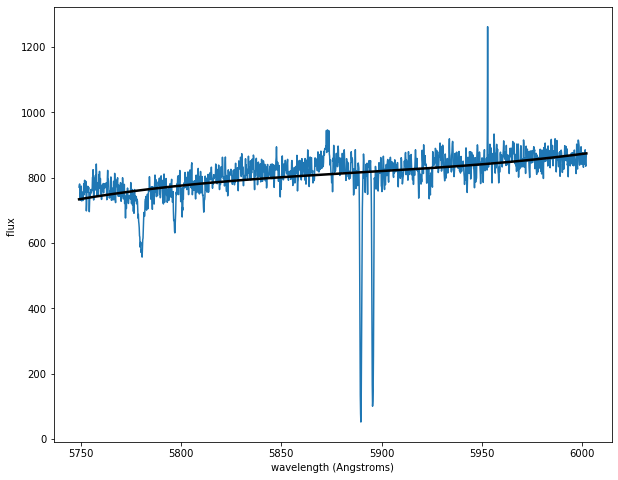

In [36]:
pixel0_ex = header_ex['CRPIX1']
delta_w_ex = header_ex ['CDELT1']
w0_ex = header_ex['CRVAL1']

wave_ex = w0_ex + np.arange(0,data_ex.size, 1)*delta_w_ex

hdu_ex.close()


print(data_ex.dtype)
print(data_ex.shape)

cfit_ex = np.poly1d(np.polyfit(wave_ex, data_ex , 3)) 

wave_ex_fine = np.linspace(min(wave_ex), max(wave_ex),2000) 




fig, ax = plt.subplots(1,1, figsize=(10,8))

ax.plot(wave_ex, data_ex)
ax.plot(wave_ex_fine, cfit_ex(wave_ex_fine), color='k', linewidth='2.5')
ax.set_xlabel('wavelength (Angstroms)')
ax.set_ylabel('flux ')

plt.show()  


In [25]:
### binning and extracting the median flux (and correspoding wavelength) 
# in each bin  


####17 was decided based on the width of the bins and the number of 
# data points in the file.
flux_med_ex = np.zeros(17)
wave_med_ex = np.zeros(17)

### the itteration and segmentation of flux and wavelengths arrays are
# with respect to the indices of each array element.  
for i in range(0, 17): 
    n = i *100 + 99 
    n_low = i *100
    
    data_seg_ex = data_ex[n_low: n + 1] 
    wave_seg_ex = wave_ex[n_low: n + 1]
    med_ex =   np.median(data_seg_ex)
    #a = np.where(data_seg == med)
    print(np.median(data_seg_ex)) 
    #print(np.median(wave_seg_ex)) 
    
    #print(np.max(data_seg), np.min(data_seg))
    #print(a[0])
    flux_med_ex[i] = med_ex
    
    mid_wave_ex = np.median(wave_seg_ex) 
    
    wave_med_ex[i] = mid_wave_ex 
    


767.85913
744.91406
742.37634
768.60754
796.2728
813.6197
817.7371
818.92786
849.19434
820.0886
817.82477
822.9519
845.4035
842.89575
862.51294
854.2565
863.2406


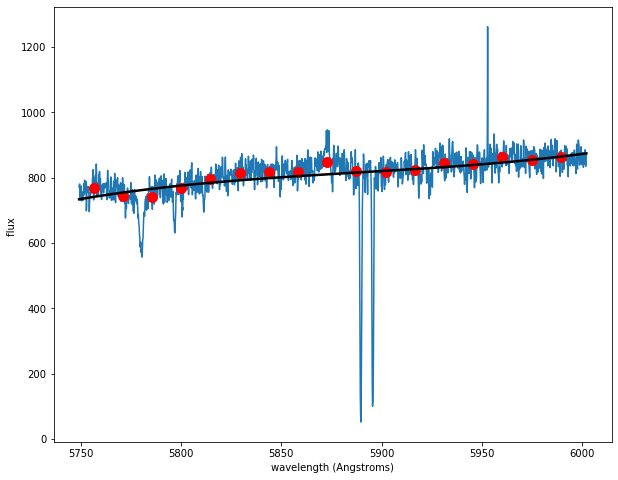

In [39]:
fig, ax = plt.subplots(1,1, figsize=(10,8))


ax.plot(wave_ex, data_ex, zorder=0)


ax.plot(wave_ex_fine, cfit_ex(wave_ex_fine), color='k', linewidth='2.5',)
ax.scatter(wave_med_ex, flux_med_ex, color='r', linewidths='5.0', zorder=2)
#ax.plot(wave_med, flux_med, color='r', linewidth='2.5')
ax.set_xlabel('wavelength (Angstroms)')
ax.set_ylabel('flux ')


plt.show()  


In [27]:
####fitting using the bin medians
cmed_fit_ex = np.polyfit(wave_med_ex, flux_med_ex , 3)
cfit2_ex = np.poly1d(cmed_fit_ex) 




           3          2
5.981e-06 x - 0.1068 x + 636.3 x - 1.263e+06


In [28]:
print(cfit2_ex)

           3          2
5.981e-06 x - 0.1068 x + 636.3 x - 1.263e+06


In [29]:
###making a finer delta_lambda for the wavelegnth array.
wave_ex_fine2 = np.linspace(min(wave_med_ex), max(wave_med_ex),2000) 

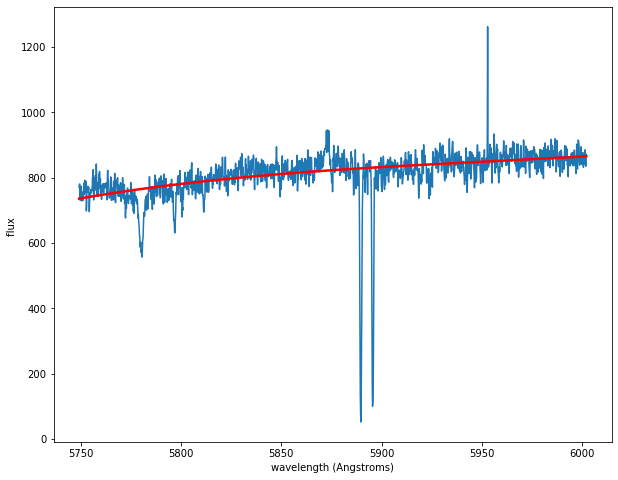

In [38]:
fig, ax = plt.subplots(1,1, figsize=(10,8))

ax.plot(wave_ex, data_ex, zorder=0)
#ax.plot(wave_fine, p(wave_fine), color='k', linewidth='1.5',) 
ax.plot(wave_ex, cfit2_ex(wave_ex), color='r', linewidth= 2.5 )
#ax.scatter(wave_med, flux_med, color='r', linewidths='5.0', zorder=2)
#ax.plot(wave_fine_2, p2(wave_fine_2), color='r', linewidth='2.5')
ax.set_xlabel('wavelength (Angstroms)')
ax.set_ylabel('flux ')

plt.show()  

In [33]:
flux_normed_ex = data_ex / cfit2_ex(wave_ex)

Text(0, 0.5, 'normalized flux ')

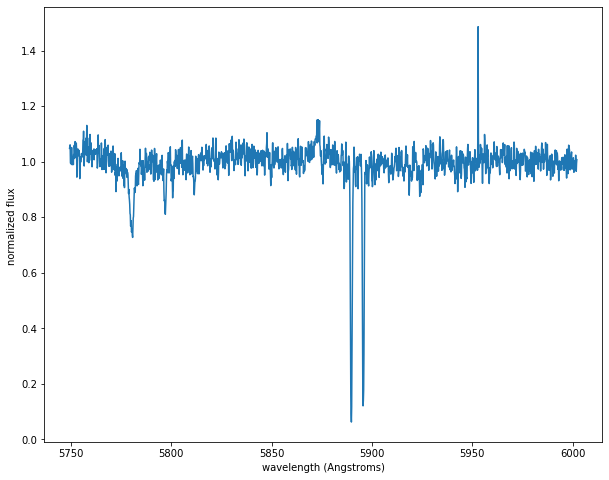

In [37]:
fig, ax = plt.subplots(1,1, figsize=(10,8))
ax.plot(wave_ex, flux_normed_ex, zorder=0)
ax.set_xlabel('wavelength (Angstroms)')
ax.set_ylabel('normalized flux ')

Above is an an example of a normalized spectrum that we use to calculate the equivalent widths.